In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data into dataframes
data1 = pd.read_csv("Data1.csv")
data2 = pd.read_csv("Data2.csv")
data3 = pd.read_csv("Data3.csv")

#### First five rows of all 3 dataframes.

In [3]:
data1.head()

,Sno,Hotelname,City,Location,Numberofreviews,Userratings,Starrating,Reviewscore
0,1,Unlock Metropolis Business Bay,Dubai,"Marasi Drive 1 AG Tower, Dubai, United Arab Em...","1,012",8.5,4,Very good
1,2,Element Dubai Airport,Dubai,"Airport Road, Al Garhoud, Next to Airport Term...","1,133",8.3,0,Very good
2,3,Golden Stay Vacation Homes continental tower m...,Dubai,"Jumeirah Beach Road, Dubai Marina, Dubai, Unit...",789,6.0,2,Pleasant
3,4,Kasco Homes - Waves Tower Business Bay,Dubai,"Marasi Drive, Dubai, United Arab Emirates",478,8.6,4,Fabulous
4,5,Fully Furnished Luxury Short Stay Apartment in...,Dubai,"Marasi Drive, Dubai, United Arab Emirates",1,10,0,Exceptional


In [4]:
data1.drop('Sno', axis=1, inplace=True)
data1.columns

Index(['Hotelname', 'City', 'Location', 'Numberofreviews', 'Userratings',
       'Starrating', 'Reviewscore'],
      dtype='object')

In [5]:
data1.isnull().sum()

Hotelname          0
City               1
Location           0
Numberofreviews    0
Userratings        0
Starrating         0
Reviewscore        0
dtype: int64

In [6]:
data2.head()

,Sno,Hotelname,Freewifi,Familyrooms,NonSmokingRooms,Restaurant,Bar,Heating,Lift,BreakfastCuisine1,BreakfastCuisine2,BreakfastCuisine3
0,1,Unlock Metropolis Business Bay,No,Yes,Yes,No,Yes,Yes,Yes,-,-,-
1,2,Element Dubai Airport,No,Yes,Yes,No,Yes,No,Yes,Continental,-,-
2,3,Golden Stay Vacation Homes continental tower m...,No,Yes,Yes,No,No,No,Yes,-,-,-
3,4,Kasco Homes - Waves Tower Business Bay,No,Yes,Yes,No,No,No,Yes,-,-,-
4,5,Fully Furnished Luxury Short Stay Apartment in...,No,No,No,No,No,Yes,No,-,-,-


In [7]:
data2.drop(['Sno','Hotelname'], axis=1, inplace=True)
data2.columns

Index(['Freewifi', 'Familyrooms', 'NonSmokingRooms', 'Restaurant', 'Bar',
       'Heating', 'Lift', 'BreakfastCuisine1', 'BreakfastCuisine2',
       'BreakfastCuisine3'],
      dtype='object')

In [8]:
data3.head()

,sno,Hotelname,RoomType,Doublebed,SingleBed,Prices
0,1,Unlock Metropolis Business Bay,Deluxe Studio with Kitchen and Balcony,No,No,10270
1,2,Element Dubai Airport,Twin Studio - Complimentary Transfer to Dubai ...,No,No,10088
2,3,Golden Stay Vacation Homes continental tower m...,One bedroom with corner city view,No,No,13999
3,4,Kasco Homes - Waves Tower Business Bay,Superior Studio,No,No,23464
4,5,Fully Furnished Luxury Short Stay Apartment in...,One-Bedroom Apartment,No,No,22217


In [9]:
data3.drop(['sno','Hotelname'], axis=1, inplace=True)
data3.columns

Index(['RoomType', 'Doublebed', 'SingleBed', 'Prices'], dtype='object')

#### Concatenating the dataframes to make 1 dataframe

In [10]:
# Concatenate horizontally (along columns)
hotel_data = pd.concat([data1, data2, data3], axis=1)

In [11]:
hotel_data.shape

(2035, 21)

In [12]:
hotel_data.columns

Index(['Hotelname', 'City', 'Location', 'Numberofreviews', 'Userratings',
       'Starrating', 'Reviewscore', 'Freewifi', 'Familyrooms',
       'NonSmokingRooms', 'Restaurant', 'Bar', 'Heating', 'Lift',
       'BreakfastCuisine1', 'BreakfastCuisine2', 'BreakfastCuisine3',
       'RoomType', 'Doublebed', 'SingleBed', 'Prices'],
      dtype='object')

In [13]:
# checking the dtypes of columns
hotel_data.dtypes

Hotelname            object
City                 object
Location             object
Numberofreviews      object
Userratings          object
Starrating            int64
Reviewscore          object
Freewifi             object
Familyrooms          object
NonSmokingRooms      object
Restaurant           object
Bar                  object
Heating              object
Lift                 object
BreakfastCuisine1    object
BreakfastCuisine2    object
BreakfastCuisine3    object
RoomType             object
Doublebed            object
SingleBed            object
Prices               object
dtype: object

#### Data Cleaning

We will change the Numberofreviews, Userratings, Prices column dtypes from object to int.

In [14]:
# Convert 'Numberofreviews' , 'Prices' and 'Userratings' to int
hotel_data['Numberofreviews'] = pd.to_numeric(hotel_data['Numberofreviews'].str.replace(',', ''), errors='coerce', downcast='integer').fillna(0)
hotel_data['Userratings'] = pd.to_numeric(hotel_data['Userratings'], errors='coerce')
hotel_data['Prices'] = pd.to_numeric(hotel_data['Prices'], errors='coerce')


In [15]:
# checking the column dtypes again
hotel_data.dtypes

Hotelname             object
City                  object
Location              object
Numberofreviews      float64
Userratings          float64
Starrating             int64
Reviewscore           object
Freewifi              object
Familyrooms           object
NonSmokingRooms       object
Restaurant            object
Bar                   object
Heating               object
Lift                  object
BreakfastCuisine1     object
BreakfastCuisine2     object
BreakfastCuisine3     object
RoomType              object
Doublebed             object
SingleBed             object
Prices               float64
dtype: object

In [16]:
# checking the number of unique hotel names
hotel_data['Hotelname'].value_counts()

Siesta Sydney                                       20
ibis Sydney Airport                                 20
Park Regis City Centre                              20
Novotel Sydney Darling Harbour                      20
Rydges Sydney Airport Hotel                         20
                                                    ..
Modern 2B1B apt in CBD - Walk to Central Station     1
The Piccadilly London West End                       1
Hotel Sophia                                         1
Clocktower Apartment Hotel                           1
Appartement élégant                                  1
Name: Hotelname, Length: 415, dtype: int64

This shows that many of the hotel are repeated in the datsett and only 415 unique values are present. We will drop these duplicated values.

In [17]:
# dropping duplicates
hotel_data.drop_duplicates(subset='Hotelname', keep='first', inplace=True)

In [18]:
hotel_data.shape

(415, 21)

In [19]:
# Identify object columns and apply the strip method
object_columns = hotel_data.select_dtypes(include=['object']).columns
hotel_data[object_columns] = hotel_data[object_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Display the cleaned DataFrame
hotel_data.head()

,Hotelname,City,Location,Numberofreviews,Userratings,Starrating,Reviewscore,Freewifi,Familyrooms,NonSmokingRooms,...,Bar,Heating,Lift,BreakfastCuisine1,BreakfastCuisine2,BreakfastCuisine3,RoomType,Doublebed,SingleBed,Prices
0,Unlock Metropolis Business Bay,Dubai,"Marasi Drive 1 AG Tower, Dubai, United Arab Em...",1012.0,8.5,4,Very good,No,Yes,Yes,...,Yes,Yes,Yes,-,-,-,Deluxe Studio with Kitchen and Balcony,No,No,10270.0
1,Element Dubai Airport,Dubai,"Airport Road, Al Garhoud, Next to Airport Term...",1133.0,8.3,0,Very good,No,Yes,Yes,...,Yes,No,Yes,Continental,-,-,Twin Studio - Complimentary Transfer to Dubai ...,No,No,10088.0
2,Golden Stay Vacation Homes continental tower m...,Dubai,"Jumeirah Beach Road, Dubai Marina, Dubai, Unit...",789.0,6.0,2,Pleasant,No,Yes,Yes,...,No,No,Yes,-,-,-,One bedroom with corner city view,No,No,13999.0
3,Kasco Homes - Waves Tower Business Bay,Dubai,"Marasi Drive, Dubai, United Arab Emirates",478.0,8.6,4,Fabulous,No,Yes,Yes,...,No,No,Yes,-,-,-,Superior Studio,No,No,23464.0
4,Fully Furnished Luxury Short Stay Apartment in...,Dubai,"Marasi Drive, Dubai, United Arab Emirates",1.0,10.0,0,Exceptional,No,No,No,...,No,Yes,No,-,-,-,One-Bedroom Apartment,No,No,22217.0


In [20]:
# checking for value counts for columns
hotel_data['Reviewscore'].value_counts()

Good           125
Very good      115
-               55
Fabulous        46
Pleasant        32
Exceptional     18
Superb          16
Passable         4
Bad              2
Poor             1
Very poor        1
Name: Reviewscore, dtype: int64

In [21]:
hotel_data['Userratings'].value_counts()

8.5     28
8.0     25
7.9     21
8.2     20
8.3     20
7.8     20
8.6     18
10.0    15
7.7     14
7.5     13
8.4     13
7.0     12
7.3     12
8.9     12
7.6     12
6.9     11
8.7     10
7.4     10
8.1      9
9.0      8
7.1      6
8.8      6
7.2      5
6.6      4
9.3      4
6.8      3
6.4      3
6.3      3
9.1      2
9.4      2
6.5      2
5.6      2
9.5      2
1.0      2
6.0      2
6.2      2
6.7      1
5.0      1
9.7      1
6.1      1
2.0      1
3.0      1
5.7      1
Name: Userratings, dtype: int64

We will fill the blank value in the Reviewscore column based on their Userratings column value

In [22]:
# Define a function to map '-' values based on 'Userratings'
def map_reviewscore(row):
    if row['Reviewscore'] == '-':
        if row['Userratings'] >= 7.0:
            return 'Very good'
        elif 3.5 <= row['Userratings'] < 6.9:
            return 'Good'
        else:
            return 'Bad'
    return row['Reviewscore']

# Apply the function to update 'Reviewscore'
hotel_data['Reviewscore'] = hotel_data.apply(map_reviewscore, axis=1)

In [23]:
# checking the value counts of reviewscore column again
hotel_data['Reviewscore'].value_counts()

Good           125
Very good      115
Bad             57
Fabulous        46
Pleasant        32
Exceptional     18
Superb          16
Passable         4
Poor             1
Very poor        1
Name: Reviewscore, dtype: int64

In [25]:
hotel_data['Reviewscore'] = hotel_data['Reviewscore'].replace(['Passable', 'Very poor'], 'Poor')

In [26]:
hotel_data['Starrating'].value_counts()

4    186
3     80
5     72
0     69
2      7
1      1
Name: Starrating, dtype: int64

In [27]:
hotel_data['Freewifi'].value_counts()

No    415
Name: Freewifi, dtype: int64

In [28]:
hotel_data['Familyrooms'].value_counts()

Yes    250
No     165
Name: Familyrooms, dtype: int64

In [29]:
hotel_data['NonSmokingRooms'].value_counts()

Yes    349
No      66
Name: NonSmokingRooms, dtype: int64

In [30]:
hotel_data['Bar'].value_counts()

No     228
Yes    187
Name: Bar, dtype: int64

In [31]:
hotel_data['Restaurant'].value_counts()

No    415
Name: Restaurant, dtype: int64

In [32]:
hotel_data['Heating'].value_counts()

Yes    351
No      64
Name: Heating, dtype: int64

In [33]:
hotel_data['Lift'].value_counts()

Yes    295
No     120
Name: Lift, dtype: int64

In [34]:
hotel_data['BreakfastCuisine1'].value_counts()

-               214
Continental,    105
Continental      45
Full             35
Vegetarian,       9
Buffet            5
Italian,          1
American          1
Name: BreakfastCuisine1, dtype: int64

In [35]:
# removing ',' from BreakfastCuisine1 value
hotel_data['BreakfastCuisine1'] = hotel_data['BreakfastCuisine1'].str.replace(',', '')

In [36]:
hotel_data['BreakfastCuisine1'].value_counts()

-              214
Continental    150
Full            35
Vegetarian       9
Buffet           5
Italian          1
American         1
Name: BreakfastCuisine1, dtype: int64

In [37]:
# replace '-' with 'Continental' since it is the most common breakfast option available
hotel_data['BreakfastCuisine1'] = hotel_data['BreakfastCuisine1'].replace('-','Continental')

In [38]:
hotel_data['BreakfastCuisine2'].value_counts()

-                 265
Full               67
Vegetarian,        23
English/Irish      21
English/Irish,     14
Vegan,              6
Italian,            5
Gluten-free,        3
American            3
Breakfast           2
Vegan               2
Halal,              1
Gluten-free         1
American,           1
Buffet              1
Name: BreakfastCuisine2, dtype: int64

In [39]:
# removing ',' from BreakfastCuisine2 value
hotel_data['BreakfastCuisine2'] = hotel_data['BreakfastCuisine2'].str.replace(',', '')
hotel_data['BreakfastCuisine2'].value_counts()

-                265
Full              67
English/Irish     35
Vegetarian        23
Vegan              8
Italian            5
Gluten-free        4
American           4
Breakfast          2
Halal              1
Buffet             1
Name: BreakfastCuisine2, dtype: int64

In [40]:
hotel_data['BreakfastCuisine3'].value_counts()

-                 293
English/Irish,     61
Halal,              9
English/Irish       6
Vegetarian,         6
Buffet              5
Gluten-free         5
Vegan,              4
Gluten-free,        4
Full                4
Vegetarian          4
American            3
American,           2
to                  2
Halal               2
Vegan               2
Breakfast           2
Asian,              1
Name: BreakfastCuisine3, dtype: int64

In [41]:
# removing ',' from BreakfastCuisine3 value
hotel_data['BreakfastCuisine3'] = hotel_data['BreakfastCuisine3'].str.replace(',', '')
hotel_data['BreakfastCuisine3'].value_counts()

-                293
English/Irish     67
Halal             11
Vegetarian        10
Gluten-free        9
Vegan              6
Buffet             5
American           5
Full               4
Breakfast          2
to                 2
Asian              1
Name: BreakfastCuisine3, dtype: int64

We can see that most of the values in these two columns 'BreakfastCuisine2' and 'BreakfastCuisine3' are balnk. so we will drop the columns.

In [42]:
hotel_data.drop(['BreakfastCuisine2','BreakfastCuisine3'], axis=1, inplace=True)

In [43]:
hotel_data['Doublebed'].value_counts()

No    415
Name: Doublebed, dtype: int64

In [44]:
hotel_data['SingleBed'].value_counts()

No    415
Name: SingleBed, dtype: int64

In [45]:
# dropping the doublebed, singlebed, freewifi and restaurant column since they contain only single value
hotel_data.drop(['Doublebed', 'SingleBed', 'Freewifi', 'Restaurant'], axis=1, inplace=True)

In [46]:
hotel_data.columns

Index(['Hotelname', 'City', 'Location', 'Numberofreviews', 'Userratings',
       'Starrating', 'Reviewscore', 'Familyrooms', 'NonSmokingRooms', 'Bar',
       'Heating', 'Lift', 'BreakfastCuisine1', 'RoomType', 'Prices'],
      dtype='object')

In [47]:
# value counts for city column
hotel_data['City'].value_counts()

Melbourne    146
London       126
Dubai         64
Paris         51
Sydney        26
-              1
Name: City, dtype: int64

#### EDA

In [48]:
hotel_data.shape

(415, 15)

In [49]:
# checking for Nan values
hotel_data.isnull().sum()

Hotelname             0
City                  1
Location              0
Numberofreviews       0
Userratings          55
Starrating            0
Reviewscore           0
Familyrooms           0
NonSmokingRooms       0
Bar                   0
Heating               0
Lift                  0
BreakfastCuisine1     0
RoomType              0
Prices                9
dtype: int64

In [50]:
hotel_data[hotel_data['Userratings'].isna()]

,Hotelname,City,Location,Numberofreviews,Userratings,Starrating,Reviewscore,Familyrooms,NonSmokingRooms,Bar,Heating,Lift,BreakfastCuisine1,RoomType,Prices
6,Work/Relaxation Blend Apartment,Dubai,"Al A'amal Street DAMAC Executive Bay, Dubai, U...",0.0,NaN,4,Bad,No,Yes,No,No,Yes,Continental,Two-Bedroom Apartment,14078.0
7,Elegant One Bed Room Apartment,Dubai,"Al Barsha 1 Al Waleed Building BA 05, Floor 5,...",0.0,NaN,4,Bad,Yes,No,No,No,No,Continental,One-Bedroom Apartment,11222.0
8,GuestReady - Rose Tint Eyes in Business Bay,Dubai,"Ubora Towers, Dubai, United Arab Emirates",0.0,NaN,4,Bad,No,No,No,No,No,Continental,One-Bedroom Apartment,19338.0
10,Keysplease Murjan 2 One Bedroom w Balcony 59B,Dubai,"Murjan 2 JBR, Jumeirah Beach Residence, Dubai,...",0.0,NaN,0,Bad,No,No,No,No,No,Continental,One-Bedroom Apartment,12469.0
11,Ultra Luxrious 1BHK Marina Dubai - 28th Floor,Dubai,"escan tower Higher Floor, Dubai Marina, Dubai,...",0.0,NaN,0,Bad,Yes,Yes,Yes,No,No,Continental,One-Bedroom Apartment,20403.0
13,Cozy Haven Studio,Dubai,"JVC Tower 108 9, Dubai, United Arab Emirates",0.0,NaN,4,Bad,Yes,Yes,Yes,Yes,No,Continental,One-Bedroom Apartment,4591.0
14,Promotional Price for Short stay Furnished 1 BHK,Dubai,"Dubai Production City, Dubai, United Arab Emir...",0.0,NaN,0,Bad,Yes,No,Yes,Yes,Yes,Continental,One-Bedroom Apartment,9163.0
17,Spacious New Studio Wpool - Gym,Dubai,"2/1, 6 Street, Dubailand Residence Complex, Wa...",0.0,NaN,4,Bad,No,No,No,No,Yes,Continental,Studio with Balcony,8161.0
18,Alashrafia Saray- Splendid 1BR apartment in Ca...,Dubai,"Marasi Drive, Dubai, United Arab Emirates",0.0,NaN,4,Bad,Yes,Yes,Yes,No,Yes,Continental,One-Bedroom Apartment,6611.0
19,Spacious -Upgraded Studio Close to Metro- Tecom,Dubai,"Madison Residency, Al Barsha Heights (Tecom), ...",0.0,NaN,4,Bad,No,Yes,No,No,Yes,Continental,Studio Apartment,16282.0


we can see that the Reviewscore for hotel with Nan Userratings is bad. We will replace this nan value with a rating of 3.

In [51]:
# Fill missing values in 'Userratings' with 3
hotel_data['Userratings'] = hotel_data['Userratings'].fillna(3)

In [52]:
hotel_data[(hotel_data['City'] == '-') | hotel_data['City'].isna()]

,Hotelname,City,Location,Numberofreviews,Userratings,Starrating,Reviewscore,Familyrooms,NonSmokingRooms,Bar,Heating,Lift,BreakfastCuisine1,RoomType,Prices
1215,-,-,-,0.0,3.0,0,Bad,No,No,No,No,No,Continental,-,NaN
1827,Urban CityScapes 2BR Apt on Bourke,NaN,"139 Bourke Street, 3000 Melbourne, Australia",1.0,8.0,0,Very good,No,No,No,Yes,No,Continental,Two-Bedroom Apartment,9729.0


We will drop the row with city name = '-' and replace the null value with 'Melbourne'.

In [53]:
# Drop rows where city is '-'
hotel_data = hotel_data.drop(hotel_data[hotel_data['City'] == '-'].index)

In [54]:
# replacing the null value in city column
hotel_data['City'] = hotel_data['City'].fillna('Melbourne')

In [55]:
# we will replace the null values in price column with mean value of the column
hotel_data['Prices'] = hotel_data['Prices'].fillna(hotel_data['Prices'].mean())

In [56]:
# checking for null values again
hotel_data.isnull().sum()

Hotelname            0
City                 0
Location             0
Numberofreviews      0
Userratings          0
Starrating           0
Reviewscore          0
Familyrooms          0
NonSmokingRooms      0
Bar                  0
Heating              0
Lift                 0
BreakfastCuisine1    0
RoomType             0
Prices               0
dtype: int64

In [57]:
# checking the summary statistics
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 2032
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hotelname          414 non-null    object 
 1   City               414 non-null    object 
 2   Location           414 non-null    object 
 3   Numberofreviews    414 non-null    float64
 4   Userratings        414 non-null    float64
 5   Starrating         414 non-null    int64  
 6   Reviewscore        414 non-null    object 
 7   Familyrooms        414 non-null    object 
 8   NonSmokingRooms    414 non-null    object 
 9   Bar                414 non-null    object 
 10  Heating            414 non-null    object 
 11  Lift               414 non-null    object 
 12  BreakfastCuisine1  414 non-null    object 
 13  RoomType           414 non-null    object 
 14  Prices             414 non-null    float64
dtypes: float64(3), int64(1), object(11)
memory usage: 51.8+ KB


In [58]:
# lets check for unique values in each column
hotel_data.nunique()

Hotelname            414
City                   5
Location             402
Numberofreviews      310
Userratings           43
Starrating             6
Reviewscore            8
Familyrooms            2
NonSmokingRooms        2
Bar                    2
Heating                2
Lift                   2
BreakfastCuisine1      6
RoomType             179
Prices               358
dtype: int64

In [59]:
print("=== Summary Statistics ===")
print()
print(hotel_data.describe())

=== Summary Statistics ===

       Numberofreviews  Userratings  Starrating        Prices
count       414.000000   414.000000  414.000000    414.000000
mean       2129.635266     7.296860    3.282609  15387.258621
std        2910.401357     1.942519    1.605027  10342.450935
min           0.000000     1.000000    0.000000   2040.000000
25%         117.750000     7.000000    3.000000   8981.250000
50%        1025.000000     7.900000    4.000000  13128.000000
75%        2977.250000     8.500000    4.000000  18250.750000
max       20906.000000    10.000000    5.000000  99093.000000


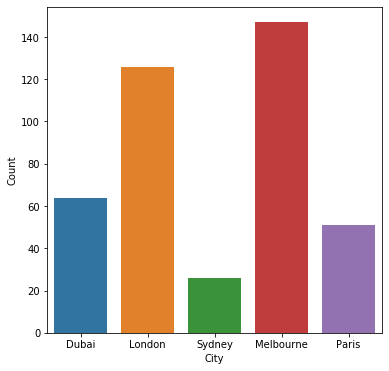

In [60]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['City'])
plt.ylabel("Count")
plt.show()

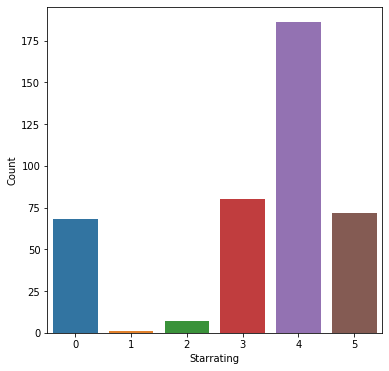

In [61]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['Starrating'])
plt.ylabel("Count")
plt.show()

A lot of hotels were awarded a star rating of 5.

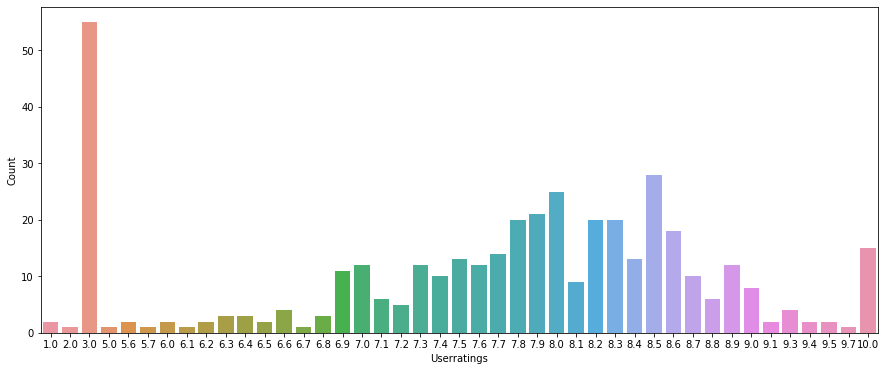

In [62]:
# Plotting barplots
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_data, x=hotel_data['Userratings'])
plt.ylabel("Count")
plt.show()

Most of the hotels were rated 3 by users followed by 8.5 and 8.0. There were considerable number of hotels with user rating of 10 suggesting that these hotels do provide their customers with top notch facilities.

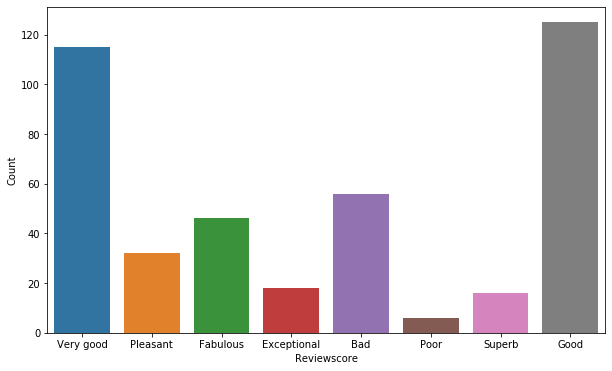

In [63]:
# Plotting barplots
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_data, x=hotel_data['Reviewscore'])
plt.ylabel("Count")
plt.show()

Most of the hotels are in the Good and Very good category.

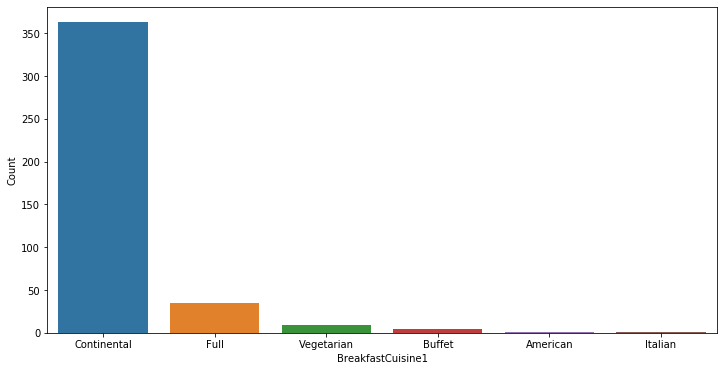

In [64]:
# Plotting barplots
plt.figure(figsize=(12,6))
sns.countplot(data=hotel_data, x=hotel_data['BreakfastCuisine1'])
plt.ylabel("Count")
plt.show()

Most of the hotels rovide Continental breakfast to their guests.

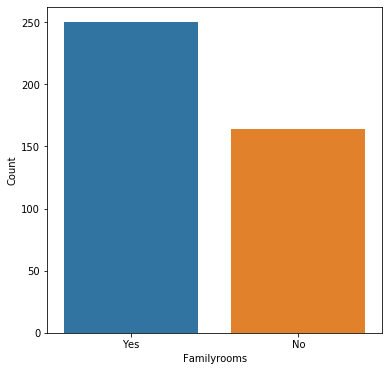

In [65]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['Familyrooms'])
plt.ylabel("Count")
plt.show()

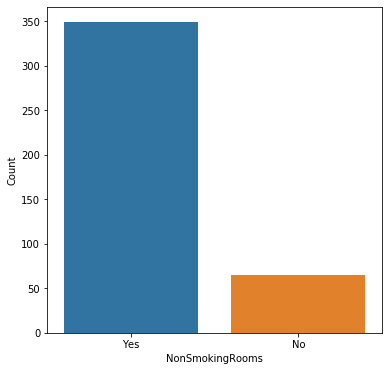

In [66]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['NonSmokingRooms'])
plt.ylabel("Count")
plt.show()

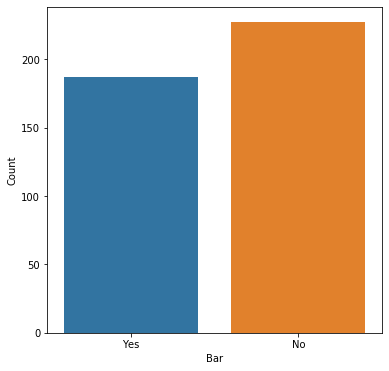

In [67]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['Bar'])
plt.ylabel("Count")
plt.show()

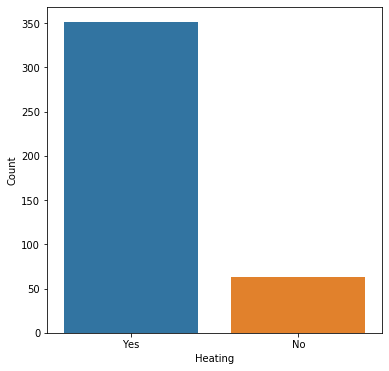

In [68]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['Heating'])
plt.ylabel("Count")
plt.show()

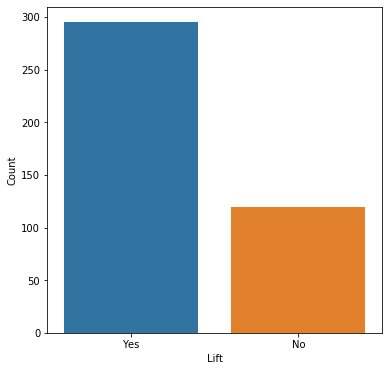

In [69]:
# Plotting barplots
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_data, x=hotel_data['Lift'])
plt.ylabel("Count")
plt.show()

From the above graphs, we can say that most hotel provide basic ammenities like non-smoking rooms, bar, lift, family rooms.

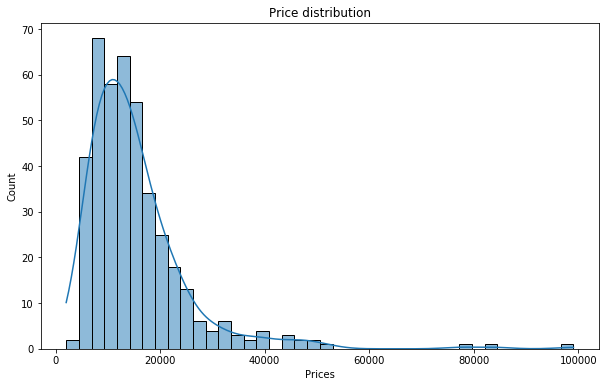

In [70]:
# plotting the Prices
plt.figure(figsize=(10,6))
sns.histplot(hotel_data['Prices'], kde=True)
plt.title("Price distribution")
plt.show()

Most of the hotels charges less than 20000 for a night. Some hotels charge as high as 100000 INR for a night.

checking how price is affected by diffenr features.

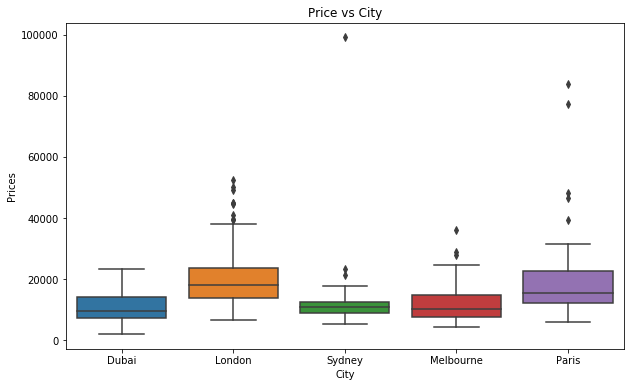

In [71]:
# lets check for price in different cities

plt.figure(figsize=(10,6))
sns.boxplot(data=hotel_data, x='City', y='Prices')
plt.title("Price vs City")
plt.show()

We can see that almost every city other than Dubai have outliers meaning there maybe some hotels in those citites which charges more than others.

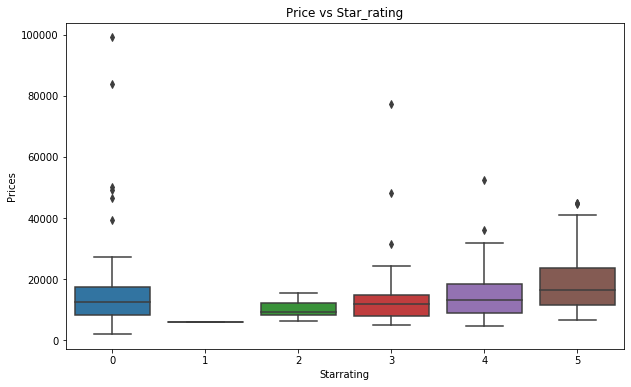

In [72]:
# lets check for price in vs star rating

plt.figure(figsize=(10,6))
sns.boxplot(data=hotel_data, y='Prices', x='Starrating')
plt.title("Price vs Star_rating")
plt.show()

1. The presence of outliers suggests that there are exceptional cases where a hotel's price is notably different from the norm for its star rating.
2. Outliers in higher-rated hotels (e.g., 5-star) may represent luxury or premium hotels with significantly higher prices, while outliers in lower-rated hotels might be budget hotels with unusually high prices.
3. There's variation in prices within each star rating, which means that factors other than just star rating contribute to hotel prices.
4. There might be some overlap in prices within each star rating category, as indicated by the height of the boxes.

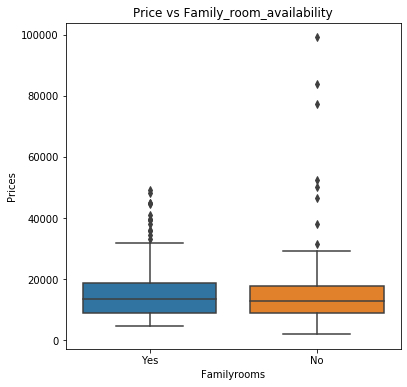

In [73]:
# lets check for price vs family room

plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='Familyrooms')
plt.title("Price vs Family_room_availability")
plt.show()

The boxplot provides a visual representation of the distribution of hotel prices for hotels with and without family rooms.
Hotel that do not have family rooms have higher number of outliers suggesting some exceptional cases of high prices.

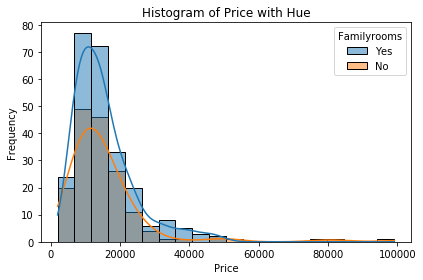

In [74]:
# lets  Create a histogram with family rooms as the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='Familyrooms', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

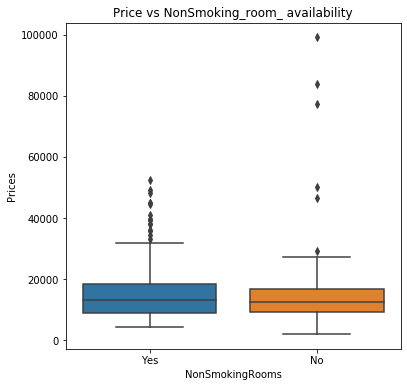

In [75]:
# plotting price vs Non-smoking room
plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='NonSmokingRooms')
plt.title("Price vs NonSmoking_room_ availability")
plt.show()

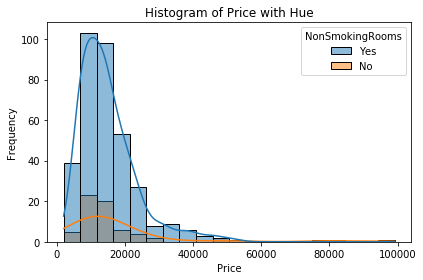

In [76]:
# lets  Create a histogram with as non smoking rooms the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='NonSmokingRooms', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

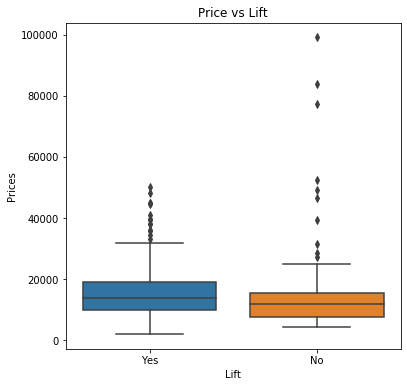

In [77]:
# plotting price vs lift availability
plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='Lift')
plt.title("Price vs Lift")
plt.show()

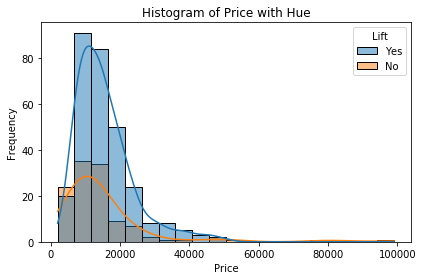

In [78]:
# lets  Create a histogram with as Lift the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='Lift', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

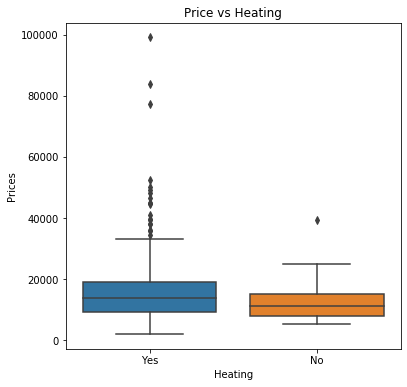

In [79]:
# plotting price vs Heating
plt.figure(figsize=(6,6))
sns.boxplot(data=hotel_data, y='Prices', x='Heating')
plt.title("Price vs Heating")
plt.show()

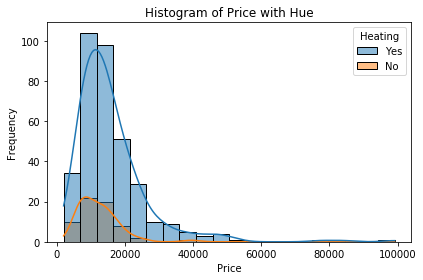

In [80]:
# lets  Create a histogram with heating as the hue parameter
sns.histplot(data=hotel_data, x='Prices', hue='Heating', bins=20, kde=True)
plt.title('Histogram of Price with Hue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

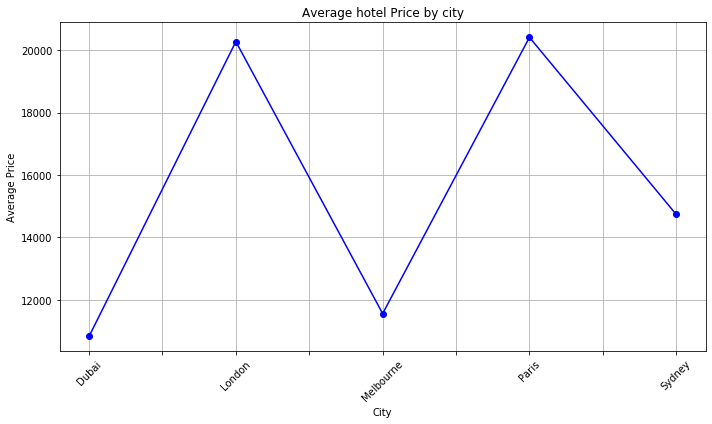

In [81]:
# Plotting the average price across cities

plt.figure(figsize=(10, 6))
hotel_data.groupby('City')['Prices'].mean().plot(marker='o', linestyle='-', color='b')

plt.title('Average hotel Price by city')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

London and Paris seems to be expensive and Dubai to be least expensive.

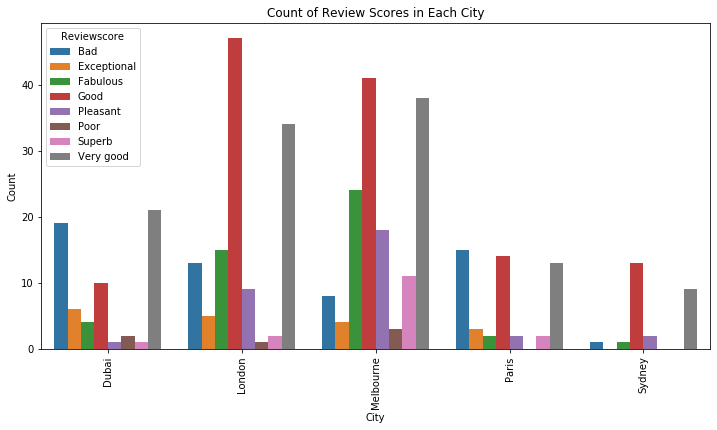

In [82]:
# Calculate the count of each review score in each city
data = hotel_data.groupby(['City', 'Reviewscore'])['Reviewscore'].count().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='City', y='Count', hue='Reviewscore')
plt.title('Count of Review Scores in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

This plot allows us to see the distribution of different review score categories, such as 'Good,' 'Very good,' 'Excellent,' and so on, within each city.

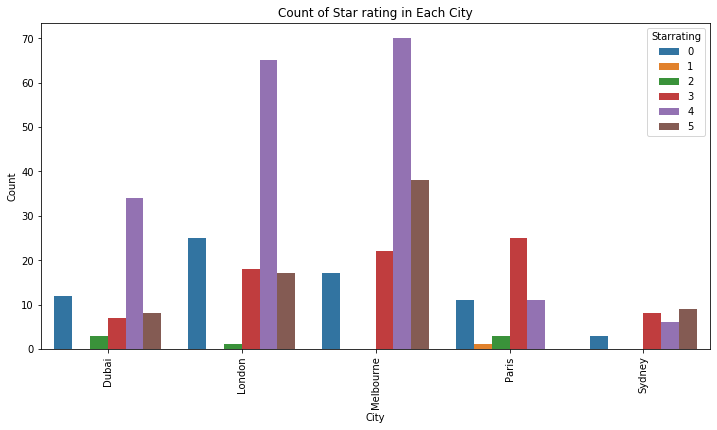

In [83]:
# Calculate the count of each review score in each city
data = hotel_data.groupby(['City', 'Starrating'])['Starrating'].count().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='City', y='Count', hue='Starrating')
plt.title('Count of Star rating in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

The plot allows you to see the distribution of different star rating within each city.

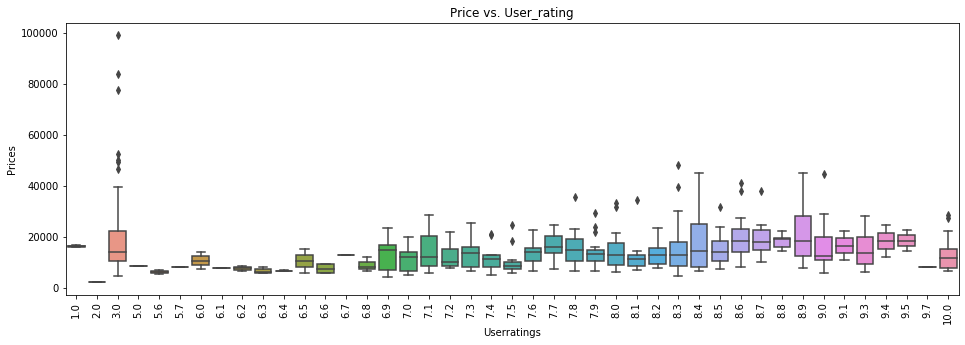

In [84]:
# AveragePrice vs. region
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
sns.boxplot(data=hotel_data, x='Userratings', y='Prices')
plt.title('Price vs. User_rating')

plt.show()

In [85]:
# Find the most expensive hotel in each city along with its price
most_expensive_hotels = hotel_data.loc[hotel_data.groupby('City')['Prices'].idxmax()][['City', 'Hotelname', 'Prices']]

# Convert Prices column to integers for sorting
most_expensive_hotels['Prices'] = most_expensive_hotels['Prices'].astype(int)

# Sort the result in descending order by price
most_expensive_hotels = most_expensive_hotels.sort_values(by='Prices', ascending=False)

# Display the most expensive hotels in each city
print(most_expensive_hotels)

           City                               Hotelname  Prices
972      Sydney         Lux Home at The Arc Bondi Beach   99093
2011      Paris                     Appartement élégant   83914
503      London             Elegant House in Marylebone   52592
1811  Melbourne                    District South Yarra   35919
3         Dubai  Kasco Homes - Waves Tower Business Bay   23464


In [86]:
# Find the hotel in each city with highest user rating
most_rated_hotels = hotel_data.loc[hotel_data.groupby('City')['Userratings'].idxmax()][['City', 'Hotelname', 'Userratings']]

# Convert Prices column to integers for sorting
most_rated_hotels['Userratings'] = most_rated_hotels['Userratings'].astype(int)

# Sort the result in descending order by price
most_rated_hotels = most_rated_hotels.sort_values(by='Userratings', ascending=False)

# Display the most expensive hotels in each city
print(most_rated_hotels)

           City                                          Hotelname  \
4         Dubai  Fully Furnished Luxury Short Stay Apartment in...   
611      London                      Modern 1Bed Flat in Islington   
1679  Melbourne                        Nest Apartments MEET Empire   
1971      Paris                                 La perle du Marais   
980      Sydney                                Moxy Sydney Airport   

      Userratings  
4              10  
611            10  
1679           10  
1971           10  
980             8  


In [87]:
# Find the hotel in each city with highest numbr of reviews
most_reviewed_hotels = hotel_data.loc[hotel_data.groupby('City')['Numberofreviews'].idxmax()][['City', 'Hotelname', 'Numberofreviews']]

# Convert Prices column to integers for sorting
most_reviewed_hotels['Numberofreviews'] = most_reviewed_hotels['Numberofreviews'].astype(int)

# Sort the result in descending order by price
most_reviewed_hotels = most_reviewed_hotels.sort_values(by='Numberofreviews', ascending=False)

# Display the most expensive hotels in each city
print(most_reviewed_hotels)

           City                                  Hotelname  Numberofreviews
652      London       Park Plaza Westminster Bridge London            20906
116       Dubai    Premier Inn Dubai International Airport            16107
2020      Paris  HotelF1 Paris Saint Ouen Marché Aux Puces            12782
1507  Melbourne                         The Victoria Hotel            10191
987      Sydney                 ibis budget Sydney Airport            10120


In [88]:
# using label encoder to convert categorical column to numerical in dataset
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns in your dataset
cat_columns = ['City','Reviewscore','Familyrooms', 'NonSmokingRooms', 'Bar', 'Heating', 'Lift', 'BreakfastCuisine1', 'RoomType']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_columns:
    hotel_data[col] = label_encoder.fit_transform(hotel_data[col])

# Display the updated dataset
hotel_data.head()

,Hotelname,City,Location,Numberofreviews,Userratings,Starrating,Reviewscore,Familyrooms,NonSmokingRooms,Bar,Heating,Lift,BreakfastCuisine1,RoomType,Prices
0,Unlock Metropolis Business Bay,0,"Marasi Drive 1 AG Tower, Dubai, United Arab Em...",1012.0,8.5,4,7,1,1,1,1,1,2,47,10270.0
1,Element Dubai Airport,0,"Airport Road, Al Garhoud, Next to Airport Term...",1133.0,8.3,0,7,1,1,1,0,1,2,174,10088.0
2,Golden Stay Vacation Homes continental tower m...,0,"Jumeirah Beach Road, Dubai Marina, Dubai, Unit...",789.0,6.0,2,4,1,1,0,0,1,2,91,13999.0
3,Kasco Homes - Waves Tower Business Bay,0,"Marasi Drive, Dubai, United Arab Emirates",478.0,8.6,4,2,1,1,0,0,1,2,157,23464.0
4,Fully Furnished Luxury Short Stay Apartment in...,0,"Marasi Drive, Dubai, United Arab Emirates",1.0,10.0,0,1,0,0,0,1,0,2,92,22217.0


In [89]:
hotel_data.drop(['Hotelname', 'Location'], axis=1, inplace=True)
hotel_data.head()

,City,Numberofreviews,Userratings,Starrating,Reviewscore,Familyrooms,NonSmokingRooms,Bar,Heating,Lift,BreakfastCuisine1,RoomType,Prices
0,0,1012.0,8.5,4,7,1,1,1,1,1,2,47,10270.0
1,0,1133.0,8.3,0,7,1,1,1,0,1,2,174,10088.0
2,0,789.0,6.0,2,4,1,1,0,0,1,2,91,13999.0
3,0,478.0,8.6,4,2,1,1,0,0,1,2,157,23464.0
4,0,1.0,10.0,0,1,0,0,0,1,0,2,92,22217.0


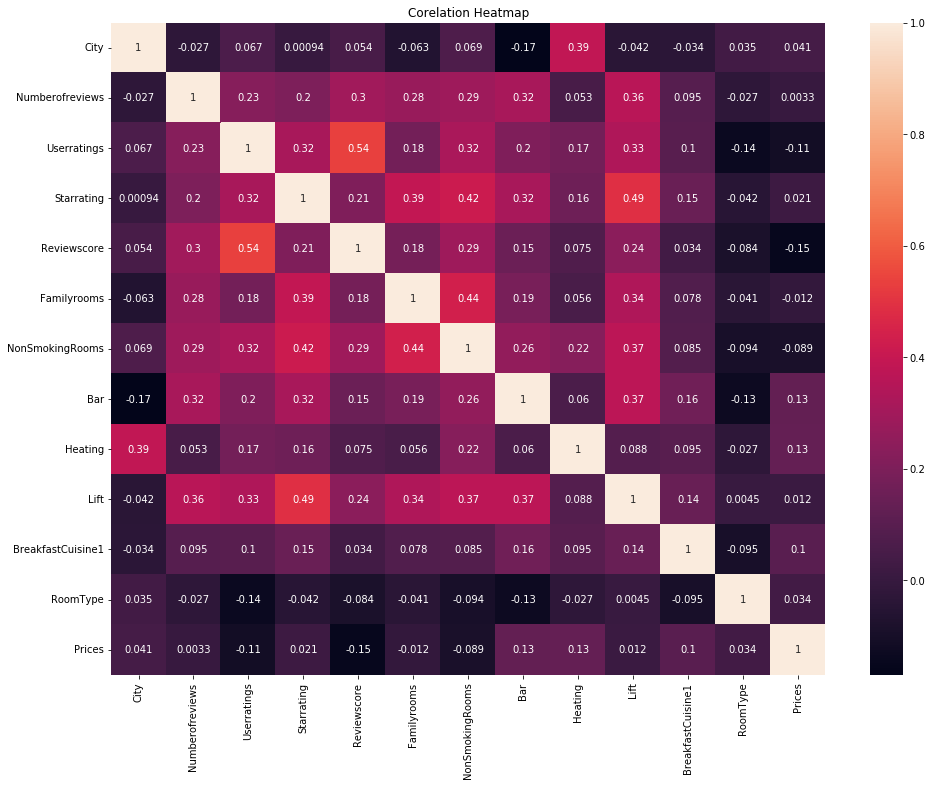

In [90]:
# lets check for correlation among columns

plt.figure(figsize=(16,12))
sns.heatmap(hotel_data.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [91]:
# lets check the correlation of features with the target variable here we have 2 target variables, Prices and Reviewscore
hotel_data.corr()['Prices'].sort_values()

Reviewscore         -0.150433
Userratings         -0.111473
NonSmokingRooms     -0.089351
Familyrooms         -0.011804
Numberofreviews      0.003266
Lift                 0.012223
Starrating           0.020669
RoomType             0.034340
City                 0.041243
BreakfastCuisine1    0.103326
Bar                  0.129374
Heating              0.131998
Prices               1.000000
Name: Prices, dtype: float64

'Prices' has the highest positive correlation with 'Heating' (0.131998) and 'Bar' (0.129374). This suggests that the presence of heating and bars in hotels may be associated with higher prices. It also has positive correlations with 'BreakfastCuisine1' (0.103326) and 'City' (0.041243). These variables may have some influence on hotel prices.

The 'Prices' column has a weak negative correlation with 'Reviewscore' (-0.146498) and 'Userratings' (-0.111473). This indicates that as prices increase, there is a slight negative correlation with review scores and user ratings. In other words, higher prices are associated with slightly lower review scores and user ratings.'Prices' has a very weak positive correlation with 'Numberofreviews' (0.003266), 'Lift' (0.012223), and 'NonSmokingRooms' (-0.089351). These correlations suggest that these factors have limited influence on hotel prices.

In [92]:
hotel_data.corr()['Reviewscore'].sort_values()

Prices              -0.150433
RoomType            -0.084140
BreakfastCuisine1    0.033868
City                 0.053606
Heating              0.074644
Bar                  0.153070
Familyrooms          0.180242
Starrating           0.207630
Lift                 0.239125
NonSmokingRooms      0.290931
Numberofreviews      0.298555
Userratings          0.537939
Reviewscore          1.000000
Name: Reviewscore, dtype: float64

The 'Reviewscore' column has the strongest positive correlation with 'Userratings' (0.498787) and 'Numberofreviews' (0.275253). This suggests that higher user ratings and more reviews are positively correlated with a higher review score.

On the other hand, 'Reviewscore' has a weak positive correlation with 'NonSmokingRooms' (0.266600), indicating that the availability of non-smoking rooms is also positively associated with a higher review score.

#### Predicting the price is an example of Regression problem.

In [93]:
# For regression, price is the target column

X= hotel_data.drop(['Prices'], axis=1)
y = hotel_data['Prices']

In [94]:
#lets check for skewness and outliers in the dataset
X.skew().sort_values()

Heating             -1.943778
NonSmokingRooms     -1.892461
Userratings         -1.447662
Starrating          -1.177111
Lift                -0.942771
Familyrooms         -0.426270
RoomType            -0.175751
Reviewscore          0.112701
Bar                  0.194852
City                 0.325073
Numberofreviews      2.727145
BreakfastCuisine1    3.397788
dtype: float64

In [95]:
# remove skewness

# Identify the columns to transform
columns_to_transform = ['Heating', 'NonSmokingRooms', 'Userratings', 'Starrating', 'Numberofreviews', 'BreakfastCuisine1']

# Apply log transformation to selected columns
for column in columns_to_transform:
    X[column] = np.log1p(X[column])

In [96]:
X.skew().sort_values()

Heating             -1.943778
Userratings         -1.898952
NonSmokingRooms     -1.892461
Starrating          -1.603035
Numberofreviews     -0.949777
Lift                -0.942771
Familyrooms         -0.426270
RoomType            -0.175751
Reviewscore          0.112701
Bar                  0.194852
City                 0.325073
BreakfastCuisine1    1.041931
dtype: float64

In [97]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

The values in the dataset that are outside these thresholds are outliers. Since this dataset is small, we will transform these outliers using flooring or capping method. In this method, a threshold is set and values above or below that threshold is replaced with the nearest non-outlying value, in this case the threshold.

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (310, 12)
X_test shape (104, 12)
y_train shape (310,)
y_test shape (104,)


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


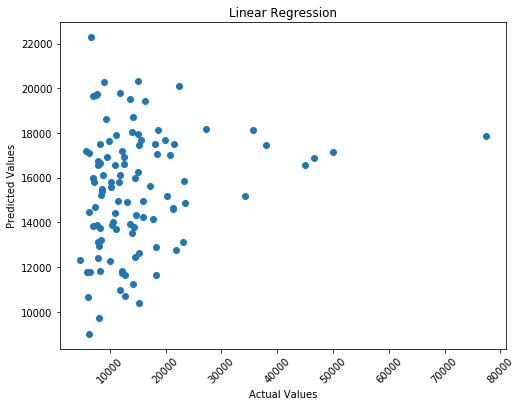

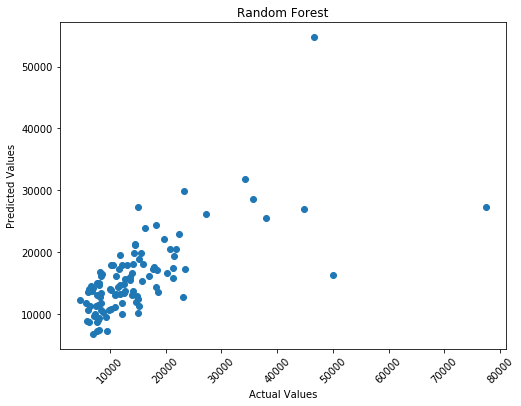

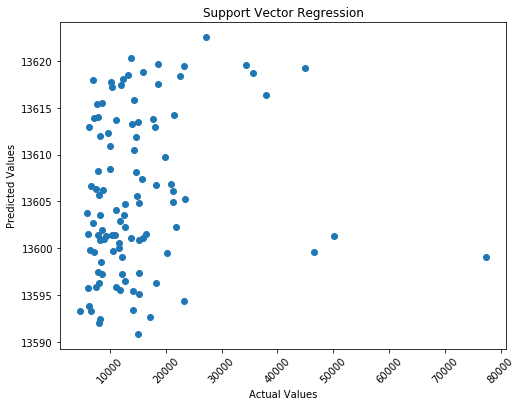

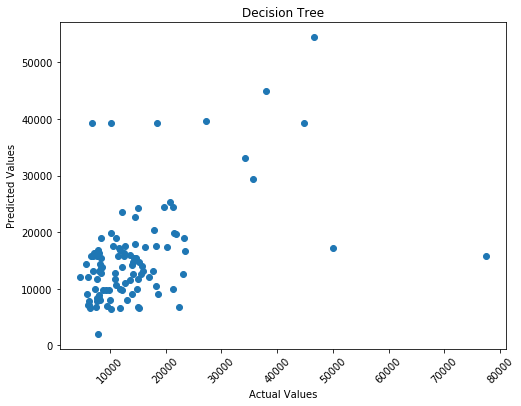

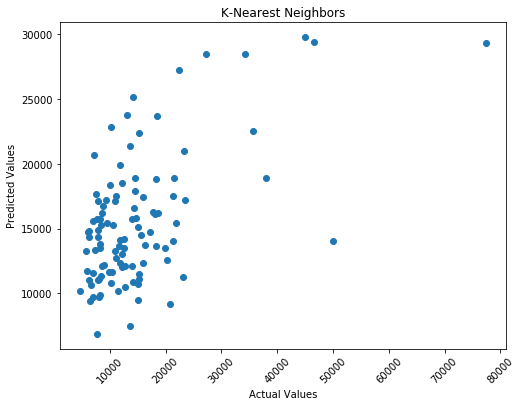

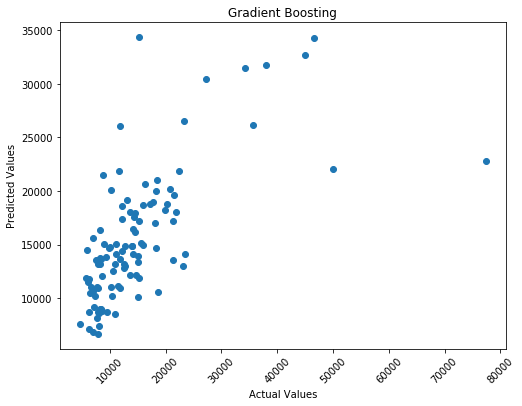

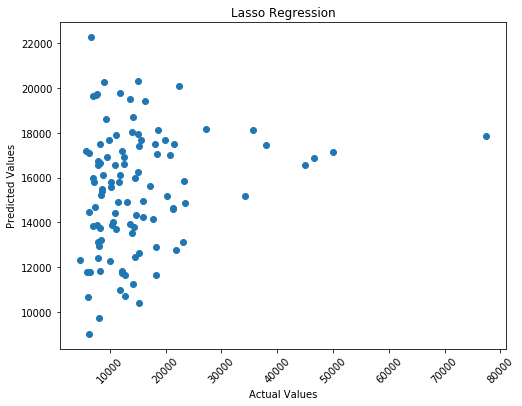

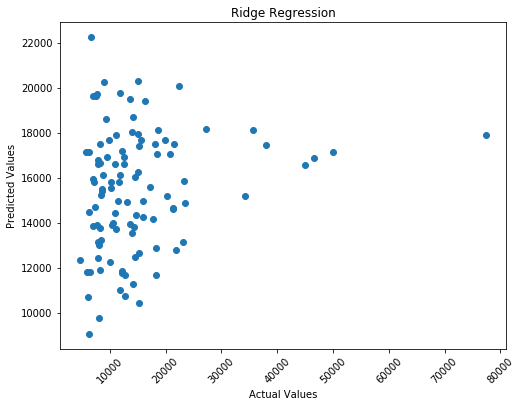

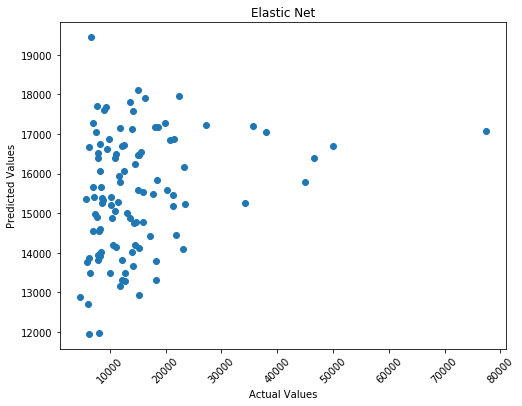

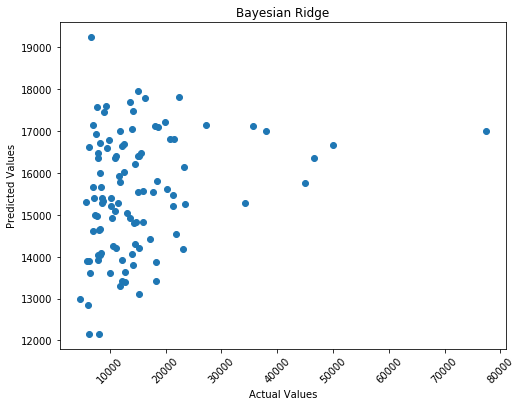

In [99]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Elastic Net', ElasticNet()),
    ('Bayesian Ridge', BayesianRidge())]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))
    
# Plotting the predicted vs actual values
for name, y_pred in predictions:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.show()

In [100]:
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,0.030836,1.060668e+08,10298.876020,6794.855496
1,Random Forest,0.446609,6.056395e+07,7782.284298,4769.285666
2,Support Vector Regression,-0.013722,1.109434e+08,10532.967534,6264.973681
3,Decision Tree,0.089663,9.962872e+07,9981.418715,5982.964191
4,K-Nearest Neighbors,0.312312,7.526169e+07,8675.349337,5894.238462
5,Gradient Boosting,0.428175,6.258148e+07,7910.845723,4536.830820
6,Lasso Regression,0.030967,1.060526e+08,10298.182218,6793.800630
7,Ridge Regression,0.031488,1.059955e+08,10295.410157,6789.260582
8,Elastic Net,0.046484,1.043544e+08,10215.398582,6608.668353
9,Bayesian Ridge,0.045372,1.044760e+08,10221.349529,6610.833316


The Gradient Boosting model stands out as the top performer based on these metrics, with the highest R² score and the lowest MSE, RMSE, and MAE. It appears to be the most suitable model for this dataset.

In [101]:
# using cross val score on the regressors
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv=5)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Diffrenece between Mean CV Score and R2 score", (r2_score(y_test,y_pred)-cv_score.mean()))
    print("\n")

Model : Linear Regression
cv_score : [-9.35900818e-01 -8.62523848e-01 -1.59815169e-03 -1.86393678e+00
 -4.85921659e-02]
Mean Score -0.7425103529272672
Diffrenece between Mean CV Score and R2 score 0.7878827297139128


Model : Random Forest
cv_score : [-1.4932515   0.12122015  0.59637693 -1.12846898 -0.28880528]
Mean Score -0.438585734994113
Diffrenece between Mean CV Score and R2 score 0.48395811178075865


Model : Support Vector Regression
cv_score : [-0.00665073 -0.96626995 -0.03161561 -0.26484943 -0.09471468]
Mean Score -0.2728200828505651
Diffrenece between Mean CV Score and R2 score 0.3181924596372107


Model : Decision Tree
cv_score : [-1.5321313  -1.7319478   0.48524036 -1.97922323 -0.41775811]
Mean Score -1.0351640153429809
Diffrenece between Mean CV Score and R2 score 1.0805363921296265




C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

Model : K-Nearest Neighbors
cv_score : [-0.84378748 -0.10846472  0.41063387 -1.48779328  0.2979946 ]
Mean Score -0.34628340277107944
Diffrenece between Mean CV Score and R2 score 0.39165577955772507


Model : Gradient Boosting
cv_score : [-0.95482154 -0.37571235  0.61229287 -0.45418842 -0.03886401]
Mean Score -0.24225868987781266
Diffrenece between Mean CV Score and R2 score 0.28763106666445826


Model : Lasso Regression
cv_score : [-9.34205003e-01 -8.62128017e-01 -1.57119798e-03 -1.86292245e+00
 -4.84868587e-02]
Mean Score -0.7418627059698009
Diffrenece between Mean CV Score and R2 score 0.7872350827564465


Model : Ridge Regression
cv_score : [-9.28012299e-01 -8.59590057e-01 -1.45427860e-03 -1.85867885e+00
 -4.85328216e-02]
Mean Score -0.7392536621544147
Diffrenece between Mean CV Score and R2 score 0.7846260389410603


Model : Elastic Net
cv_score : [-0.42808424 -0.6733924   0.00863216 -1.47810774 -0.04206886]
Mean Score -0.5226042151942564
Diffrenece between Mean CV Score and R2 sc

The Gradient Boosting model stands out as the top performer.

In [103]:
#hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X, y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [105]:
# final model
final = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2,
                                  min_samples_leaf=4, max_features='auto')
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
print("R2_score :", r2_score(y_test,final_pred))

R2_score : 0.5679280187508351


In [106]:
# saving the model
import joblib
joblib.dump(final, "Hotel_prices.pkl")

['Hotel_prices.pkl']

#### Predicting the review score is a classification problem

In [107]:
# for classification, region is the target variable
X_c = hotel_data.drop(['Reviewscore'], axis=1)
y = hotel_data['Reviewscore']

In [108]:
# checking and correcting skewness
X_c.skew().sort_values()

Heating             -1.943778
NonSmokingRooms     -1.892461
Userratings         -1.447662
Starrating          -1.177111
Lift                -0.942771
Familyrooms         -0.426270
RoomType            -0.175751
Bar                  0.194852
City                 0.325073
Numberofreviews      2.727145
Prices               3.347208
BreakfastCuisine1    3.397788
dtype: float64

In [109]:
# finding and transforming outliers
# Iterate over each column in X
for col in X_c.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X_c[col], 25)
    Q3 = np.percentile(X_c[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X_c[col] = np.where(X_c[col] < lower_threshold, lower_threshold, X_c[col])
    X_c[col] = np.where(X_c[col] > upper_threshold, upper_threshold, X_c[col])

In [110]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X_c)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (310, 12)
X_test shape (104, 12)
y_train shape (310,)
y_test shape (104,)


In [111]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100)),
    ('SVC', SVC()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=100)),
    ('LogisticRegression', LogisticRegression())]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print()

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)
    
print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[14  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  4]
 [ 0  0  5  4  0  0  0  6]
 [ 0  0  3 19  1  0  0  4]
 [ 0  0  1  5  0  0  0  2]
 [ 2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  1  1]
 [ 0  0  2 18  0  0  0  8]]

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[14  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0 28]]

Model:  RandomForestClassifier(

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[14  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  2  0]
 [ 0  0 11  0  0  0  1  3]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  2  6  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0 28]]

Model:  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[14  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0 28]]

Model:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
[[14  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  5]
 [ 0  0  3  0  0  0  0 12]
 [ 0  0  1 22  0  0  0  4]
 [ 0  0  0  7  1  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  2]
 [ 0  0  1  4  0  0  0 23]]

Model:  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
          

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', a

[[14  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0 28]]

Model:  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[14  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0 28]]

Model:  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[14  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  1  1]
 [ 0  0  7  0  0  0  2  6]
 [ 0  0  0 24  0  0  0  3]
 [ 0  0  0  3  5  0  0  0]
 [ 1  0  0  1  0  0  0  0]
 [ 0  2  0  0  0  0  1  1]
 [ 0  0  0  6  0  0  0 22]]

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[[14  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  5]
 [ 0  0  3  1  0  0  0 11]
 [ 0  0  1 19  0  0  0  7]
 [ 1  0  0  7  0  0  0  0]
 [ 1  0  0  1  0  0  0  0]
 [ 0  2  1  0  0  0  0  1]
 [ 0  0  2 15  0  0  0 11]]

                Model  Accuracy  F1 Score  Precision    Recall
0          KNeighbors  0.461538  0.423684   0.428963  0.461538
1        DecisionTree  0.980769  0.971795   0.963942  0.980769
2        RandomForest  0.875000  0.863319   0.864307  0.875000
3            AdaBoost  0.721154  0.61047

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py

DecisionTree, GradientBoosting, or RandomForest consistently exhibit high performance across multiple evaluation metrics.

In [112]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_c, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.33333333 0.36144578 0.40243902 0.32098765 0.24691358]
Mean Score 0.33302387508480175
Difference between accuracy and cv score is:  0.11889920183827518


Model : DecisionTree
cv_score : [0.97701149 0.98795181 1.         1.         1.        ]
Mean Score 0.9929926602963579
Difference between accuracy and cv score is:  -0.541069583373281


Model : RandomForest
cv_score : [0.90804598 0.93975904 0.96341463 0.97530864 0.96296296]
Mean Score 0.949898250448137
Difference between accuracy and cv score is:  -0.4979751735250601


Model : AdaBoost
cv_score : [0.71264368 0.75903614 0.76829268 0.7654321  0.7654321 ]
Mean Score 0.7541673406393852
Difference between accuracy and cv score is:  -0.30224426371630825




C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

Model : SVC
cv_score : [0.28735632 0.31325301 0.32926829 0.32098765 0.30864198]
Mean Score 0.31190145123996593
Difference between accuracy and cv score is:  0.140021625683111


Model : GradientBoosting
cv_score : [0.97701149 1.         1.         1.         0.98765432]
Mean Score 0.9929331630481055
Difference between accuracy and cv score is:  -0.5410100861250287


Model : Bagging
cv_score : [0.97701149 1.         1.         1.         1.        ]
Mean Score 0.9954022988505746
Difference between accuracy and cv score is:  -0.5434792219274978


Model : ExtraTrees
cv_score : [0.71264368 0.74698795 0.8902439  0.80246914 0.83950617]
Mean Score 0.7983701682098296
Difference between accuracy and cv score is:  -0.3464470912867527




C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

Model : LogisticRegression
cv_score : [0.47126437 0.54216867 0.54878049 0.48148148 0.48148148]
Mean Score 0.5050352986565456
Difference between accuracy and cv score is:  -0.05311222173346869




C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


DecisionTree, RandomForest, and Bagging appear to be strong candidates for the best model.


"DecisionTree" model is the best performing model among all. Here are the key reasons for selecting the DecisionTree model:

High Accuracy: The DecisionTree model has an accuracy of 98.08%, which is the highest among the models you've tested. This indicates that it correctly predicts the classes for most of the samples.

High F1 Score: The F1 Score, which is a balance between precision and recall, is also very high at 97.18%. This means the model achieves a good balance between minimizing false positives and false negatives.

High Precision: The precision of the DecisionTree model is 96.39%, indicating that when it predicts a class, it is often correct.

High Recall: The recall of the DecisionTree model is 98.08%, which indicates that the model captures most of the positive samples.

Stability: The model has a relatively small difference between accuracy and cross-validation scores, which suggests stability.

In [113]:
#hyperparameter tuning

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameters to search through
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [115]:
# final model
final = DecisionTreeClassifier(max_depth=20 ,min_samples_leaf=1 ,min_samples_split=2)
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, final_pred))

Accuracy :  0.9807692307692307


In [116]:
# saving the model
import joblib
joblib.dump(final, "Hotel_reviewscore.pkl")

['Hotel_reviewscore.pkl']